In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'online-food-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4527983%2F7745817%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T132050Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6832a6474488237797575c8f9ed93b36e5682011c28a203728c30fdfaff9e4c04ab3ad9f0609cb852ce707118cd5d6b75ba92c29743c744f2115d210703aa060848512107afd9acc091f616502a19b87e2844f38bf798687bcf7f2046554dc0416e175d09cfed6613a56e4af13ae06eb82c86136e6ed6575ff1f63846dea8ee50cf81d58501027e47ff893640a597ce0f84d85cf278b8ff90707bb980f93f3dd93184334b35700ce94cb92b099e0de35d0e0c4fb79c3a91e462107bf288e613c19858274e6d6ad6cf1d028d2c264de141d159f4446bea4caa8916bce6ccdc61a5e6dc97ead60a99c68c6d571908aa6a71a25c1dc411536ab27d6bec4f8dc5ba7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3453 bytes downloaded
Downloaded and uncompressed: online-food-dataset
Data source import complete.


# **Online Food Analysis**

## **Overview of Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')
df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   Positive         Yes

In [4]:
df.drop(columns='Unnamed: 12', inplace=True)

In [5]:
df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback  
0    Yes   Positive  
1    Yes   Positive  
2    Yes  Negative   
3    Yes   Positive  
4    Yes   Positive

In [6]:
df.shape

(388, 12)

In [7]:
df.describe()

Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000

In [8]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

## **Market Segmentation Analysis:**

### What is the distribution of individuals across different age groups?

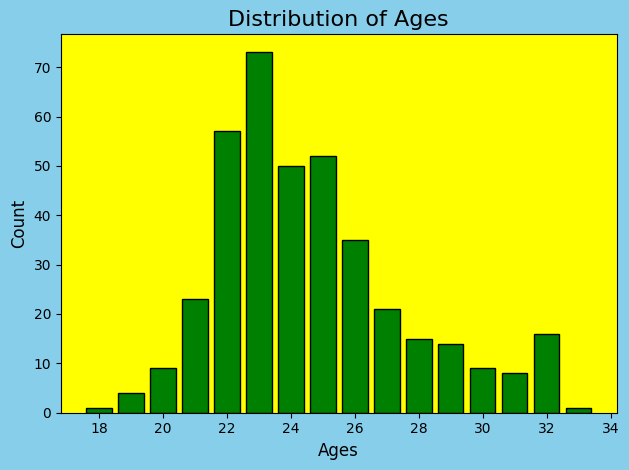

In [9]:
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='green', edgecolor='black')
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Ages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.gcf().patch.set_facecolor('skyblue')
plt.gca().set_facecolor('yellow')
plt.show()

### How does marital status correlate with educational qualifications?

In [10]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Marital Status'], df['Educational Qualifications'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 55.917538967818274
p-value: 2.927091109293357e-09
Degrees of freedom: 8
Expected frequencies table:
[[4.92680412e+01 6.40206186e+00 4.84329897e+01 3.34020619e+00
  5.56701031e-01]
 [5.47422680e+00 7.11340206e-01 5.38144330e+00 3.71134021e-01
  6.18556701e-02]
 [1.22257732e+02 1.58865979e+01 1.20185567e+02 8.28865979e+00
  1.38144330e+00]]


## **Customer Behavior Analysis:**

### How does marital status affect monthly income?

In [11]:
pd.DataFrame(df.groupby('Monthly Income'))[0]

0     10001 to 25000
1     25001 to 50000
2     Below Rs.10000
3    More than 50000
4          No Income
Name: 0, dtype: object

In [12]:
df.loc[df['Monthly Income'] == '10001 to 25000', 'Monthly Income'] = 17500
df.loc[df['Monthly Income'] == '25001 to 50000', 'Monthly Income'] = 37500
df.loc[df['Monthly Income'] == 'Below Rs.10000', 'Monthly Income'] = 10000
df.loc[df['Monthly Income'] == 'More than 50000', 'Monthly Income'] = 50000
df.loc[df['Monthly Income'] == 'No Income', 'Monthly Income'] = 0

In [13]:
df['Monthly Income'] = df['Monthly Income'].astype(int)

In [14]:
pd.DataFrame(df.groupby('Marital Status')['Monthly Income'].mean().sort_values(ascending=False))

Monthly Income
Marital Status                   
Married              34884.259259
Prefer not to say    30625.000000
Single                9664.179104

### Do students have any significant spending patterns or preferences compared to other occupation groups?

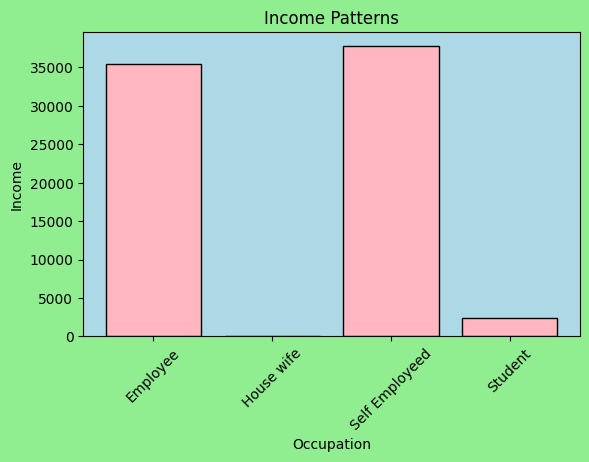

In [15]:
income_pattern = df.groupby('Occupation')['Monthly Income'].mean()

plt.figure(figsize=(6,4))
plt.bar(income_pattern.index, income_pattern.values, color='lightpink', edgecolor='black')
plt.title('Income Patterns')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('lightblue')
plt.show()

## **Predictive Analysis**

In [16]:
df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student               0   
1   24  Female         Single    Student           10000   
2   22    Male         Single    Student           10000   
3   22  Female         Single    Student               0   
4   22    Male         Single    Student           10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback  
0    Yes   Positive  
1    Yes   Positive  
2    Yes  Negative   
3    Yes   Positive  
4    Yes   Positive

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Monthly Income'), df['Monthly Income'], test_size=0.2, random_state=42)

In [19]:
pd.DataFrame(X_train).head()

Age Gender Marital Status      Occupation Educational Qualifications  \
63    23   Male         Single         Student                   Graduate   
238   27   Male        Married        Employee                   Graduate   
132   23   Male         Single         Student              Post Graduate   
101   23   Male         Single         Student              Post Graduate   
351   25   Male         Single  Self Employeed                   Graduate   

     Family size  latitude  longitude  Pin code Output  Feedback  
63             4   12.9343    77.6044    560029    Yes  Positive  
238            2   12.8845    77.6036    560076    Yes  Positive  
132            2   13.0019    77.5713    560003    Yes  Positive  
101            2   12.9442    77.6076    560030    Yes  Positive  
351            2   12.9783    77.6408    560038    Yes  Positive

In [20]:
X_train.shape

(310, 11)

In [21]:
numerical_columns = [0, 5, 6, 7, 8]
cat_nominal = [1, 2, 3]
cat_ordinal = [5, 9, 10]

In [22]:
handle_numerical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean'))
])

In [23]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

In [24]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [25]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('nominal', handle_nominal, cat_nominal),
    ('ordinal', handle_ordinal, cat_ordinal)
])

In [26]:
model = LinearRegression()

In [27]:
pipe = make_pipeline(preprocessing, model)

In [28]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [0, 5, 6, 7, 8]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [1, 2, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [5, 9, 10])])),
                ('linearregression', LinearRegression())])

In [29]:
y_pred = pipe.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6679.056589923826
Mean Squared Error (MSE): 86780623.09970023
R-squared (R2) Score: 0.7568063975409598


## **SUMBER CODE & DATASETS**

In [ ]:
Dataset : https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset
Code : https://www.kaggle.com/code/zain280/online-food-prediction